# 1. Zbiór danych


In [4]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split

In [5]:
X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=320584)

# 2. Eksperyment

In [7]:
criterions = ['gini', 'entropy']
max_depths = list(range(5, 20))
min_samples_leafs = list(range(5, 31, 5))
max_features = ['auto', 'sqrt', 'log2']

In [8]:
best_accuracy = 0
best_criterion = None
best_max_depth = None
best_min_samples_leaf = None
best_max_features = None

In [9]:
from sklearn.model_selection import cross_val_score

In [11]:
for criterion in criterions:
    for max_depth in max_depths:
        for min_samples_leaf in min_samples_leafs:
            for max_feature in max_features:
                Tree = tree.DecisionTreeClassifier(criterion = criterion, max_depth = max_depth, 
                                                   min_samples_leaf = min_samples_leaf, 
                                                   max_features = max_feature, random_state = 320584)
                scores = cross_val_score(Tree, X_train, y_train, cv=5)
                mean_accuracy = np.mean(scores)
                if mean_accuracy > best_accuracy:
                    best_accuracy = mean_accuracy
                    best_criterion = criterion
                    best_max_depth = max_depth
                    best_min_samples_leaf = min_samples_leaf
                    best_max_features = max_feature

# 3. Analiza jakości predykcyjnej modelu

In [12]:
best_tree = tree.DecisionTreeClassifier(criterion = best_criterion, max_depth = best_max_depth, 
                                       min_samples_leaf = best_min_samples_leaf,
                                       max_features = best_max_features, random_state = 320584)
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=16, max_features='auto',
                       min_samples_leaf=5, random_state=320584)

In [13]:
y_pred = best_tree.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[2408,  604],
       [ 586, 2402]], dtype=int64)

In [15]:
accuracy = best_tree.score(X_test, y_test)
accuracy

0.8016666666666666

In [16]:
TN = confusion[0][0]
FN = confusion[1][0]
FP = confusion[0][1]
TP = confusion[1][1]

In [17]:
sensitivity = TP / (TP + FN)
sensitivity

0.8038821954484605

In [18]:
precision = TP / (TP + FP)
precision

0.7990685296074518

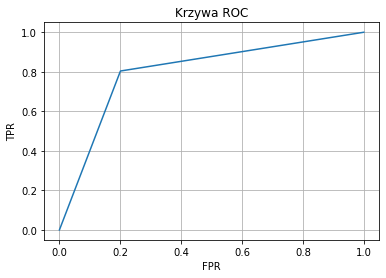

In [19]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.grid()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Krzywa ROC')
plt.show()

In [20]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.8016754934745622